# Packages


In [ ]:
import sklearn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import itertools
import math
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.metrics import confusion_matrix
import seaborn as sn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Ignore sckl warning
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Obtaining Data

## Lemmatizer and vectorizer
Functions to pre-process text data

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("testers")

'tester'

In [ ]:
lemmatizer = WordNetLemmatizer()
def cleanup(s):
     stop = set(stopwords.words('english'))
     tokens = nltk.word_tokenize(s)
     clean = []
     for t in tokens: 
      if t not in stop and t not in string.punctuation:
        
        t = lemmatizer.lemmatize(t)
        t = t.upper()
        clean.append(t)
     return clean




#USELESS STUFF TO BE DELETED ONLY FOR TESTING

#example of use and for testing purposes. The cleaner will remove punctuation, stopwords and will then lemmative the word and switch to uppercase
# s = "I am going to disco and bar tonight. ; wow corpus shooting tester wooos balls baller balling ballet ballets bros bro how hoe hot hots hows"
# tokens = nltk.word_tokenize(s)
# x = cleanup(s)
# print (x)

In [ ]:
#USELESS STUFF TO BE DELETED ONLY FOR TESTING

#The vectorizer uses the cleaner to tokenize
# vectorizer = CountVectorizer(tokenizer=cleanup)

#testing the vectorizer
# print(vectorizer.fit_transform(['daddy this daddy is in a testing tests tester testers yeet yeehaw; , ,,, asd qqq',' gang daddy']))
# vectorizer.vocabulary_

## News data

In [ ]:
newsTrain = sklearn.datasets.fetch_20newsgroups( data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']), download_if_missing=True, return_X_y=False)
newsTest = sklearn.datasets.fetch_20newsgroups( data_home=None, subset='test', categories=None, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']), download_if_missing=True, return_X_y=False)

In [ ]:
#news X values with vectorized transformer
vectorizerNews = CountVectorizer(tokenizer=cleanup, min_df=5)
vec_news_train = vectorizerNews.fit_transform(newsTrain.data)
vec_news_test = vectorizerNews.transform(newsTest.data)

In [ ]:
news_train_y = newsTrain.target
news_test_y = newsTest.target

In [ ]:
print(np.bincount(news_train_y))
print(np.bincount(news_test_y))
print(news_train_y.shape)
print(news_test_y.shape)

[480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]
[319 389 394 392 385 395 390 396 398 397 399 396 393 396 394 398 364 376
 310 251]
(11314,)
(7532,)


In [ ]:
#news X values with idf transformer
idfnews = TfidfTransformer()
idf_news_train = idfnews.fit_transform(vec_news_train)
idf_news_test = idfnews.fit_transform(vec_news_test)

## Sentiment 140 data

In [ ]:
test_download = "https://docs.google.com/uc?export=download&id=" + '1FZN8GaKSqEMReblNghshAXt8GqOpZtsh'

if not os.path.isfile('./sent140testdata.csv'):
  !wget -O sent140testdata.csv --no-check-certificate "$test_download"

train_download = "https://docs.google.com/uc?export=download&id=" + '1WZ1Xg9txcGwwd4hqtUdPX1ijThP9Yp-J&confirm=t'

if not os.path.isfile('./sent140trainingdata.csv'):
  !wget -O sent140trainingdata.csv --no-check-certificate "$train_download"




--2022-03-07 17:15:06--  https://docs.google.com/uc?export=download&id=1FZN8GaKSqEMReblNghshAXt8GqOpZtsh
Resolving docs.google.com (docs.google.com)... 172.217.203.102, 172.217.203.101, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2llpi6c380a6pqgqn63r8cs2ci4cts68/1646673300000/15230808736385328806/*/1FZN8GaKSqEMReblNghshAXt8GqOpZtsh?e=download [following]
--2022-03-07 17:15:06--  https://doc-0g-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2llpi6c380a6pqgqn63r8cs2ci4cts68/1646673300000/15230808736385328806/*/1FZN8GaKSqEMReblNghshAXt8GqOpZtsh?e=download
Resolving doc-0g-a0-docs.googleusercontent.com (doc-0g-a0-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0g-a0-docs.googleusercontent.com (doc-0g-a0-docs

In [ ]:
dftest_sent140_raw = pd.read_csv('sent140testdata.csv', header=None)
print(dftest_sent140_raw.head)

dftrain_sent140_raw = pd.read_csv('sent140trainingdata.csv', encoding='latin-1', header=None).sample(frac=0.25)
#print(dftrain_sent140_raw.head)

<bound method NDFrame.head of      0      1                             2        3                4  \
0    4      3  Mon May 11 03:17:40 UTC 2009  kindle2           tpryan   
1    4      4  Mon May 11 03:18:03 UTC 2009  kindle2           vcu451   
2    4      5  Mon May 11 03:18:54 UTC 2009  kindle2           chadfu   
3    4      6  Mon May 11 03:19:04 UTC 2009  kindle2            SIX15   
4    4      7  Mon May 11 03:21:41 UTC 2009  kindle2         yamarama   
..  ..    ...                           ...      ...              ...   
354  4  14071  Sun Jun 14 04:31:28 UTC 2009    latex           yomcat   
355  0  14073  Sun Jun 14 04:32:17 UTC 2009    latex           sam33r   
356  4  14074  Sun Jun 14 04:36:34 UTC 2009    latex  iamtheonlyjosie   
357  0  14075  Sun Jun 14 21:36:07 UTC 2009     iran        plutopup7   
358  0  14076  Sun Jun 14 21:36:17 UTC 2009     iran     captain_pete   

                                                     5  
0    @stellargirl I loooooooovvvvvve

In [ ]:
vectorizer = CountVectorizer(tokenizer=cleanup, min_df=5)

training_labels_sent140 = np.array(dftrain_sent140_raw.iloc[:,0].tolist())
vectorized_training_data_sent140 = vectorizer.fit_transform(dftrain_sent140_raw.iloc[:, 5].tolist())

test_labels_sent140 = np.array(dftest_sent140_raw.iloc[:,0].tolist())
vectorized_test_data_sent140 = vectorizer.transform(dftest_sent140_raw.iloc[:, 5].tolist())

In [ ]:
print(np.bincount(training_labels_sent140))
print(np.bincount(test_labels_sent140))
print(training_labels_sent140.shape)
print(test_labels_sent140.shape)

[200019      0      0      0 199981]
[177   0   0   0 182]
(400000,)
(359,)


In [ ]:
#sent 140 X values with idf transformer
idfsent = TfidfTransformer()
idf_sent_train = idfsent.fit_transform(vectorized_training_data_sent140)
idf_sent_test = idfsent.fit_transform(vectorized_test_data_sent140)

In [ ]:
# dftrain_sent140 = pd.DataFrame("Labels": training_labels_sent140,  vectorized_training_data_sent140))
# print(vectorized_training_data_sent140.shape)

# training_data_sent140 = []
# for i in range(vectorized_training_data_sent140.shape[0]):
#   training_data_sent140.append(vectorized_training_data_sent140[i,:])
# Takes about 3 minutes

#Softmax Regression 

###Function

In [ ]:
def softmax(x_train,y_train,x_test,y_test,datalabels,plot = 1,penalty = 'l2', C = 1.0, fit_intercept = True, solver = 'lbfgs', max_iter = 100):
  #Fit
  softMax = LogisticRegression(random_state=0,multi_class='multinomial',max_iter=max_iter,fit_intercept= fit_intercept, solver=solver, C=C, penalty= penalty).fit(x_train, y_train)

  #Predict
  yh  = softMax.predict(x_test)

  #Accuracy check

  accuracy = np.sum(yh == y_test) / y_test.shape[0]
  print(f'Overall accuracy is {accuracy*100:.1f}%')

  
  #For graphing confusion matrix
  y_true = y_test.tolist()
  y_pred = yh.tolist()
  
  confusion = confusion_matrix(y_true, y_pred)
  confusionDF = pd.DataFrame(confusion, index = datalabels,
                    columns = datalabels)

  print(confusionDF)
 
  if plot == 1: 
    plt.figure(figsize = (20,14))
    sn.heatmap(confusionDF, annot=True)

  cm = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] 
  print("\n Here is the accuracy for each class")
  for label, acc in zip (datalabels,cm.diagonal().tolist()):
    print("\n",label,"\t" , round(acc * 100,2),'%')
  
  return accuracy

### News Data

Overall accuracy is 60.2%
                          alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
alt.atheism                       134              2                        5   
comp.graphics                       2            239                       33   
comp.os.ms-windows.misc             2             30                      210   
comp.sys.ibm.pc.hardware            1             21                       48   
comp.sys.mac.hardware               1              8                       19   
comp.windows.x                      2             33                       36   
misc.forsale                        0              7                        6   
rec.autos                           5              4                        5   
rec.motorcycles                     4              2                        1   
rec.sport.baseball                  6              5                        0   
rec.sport.hockey                    3              0                        2   
sc

0.6019649495485927

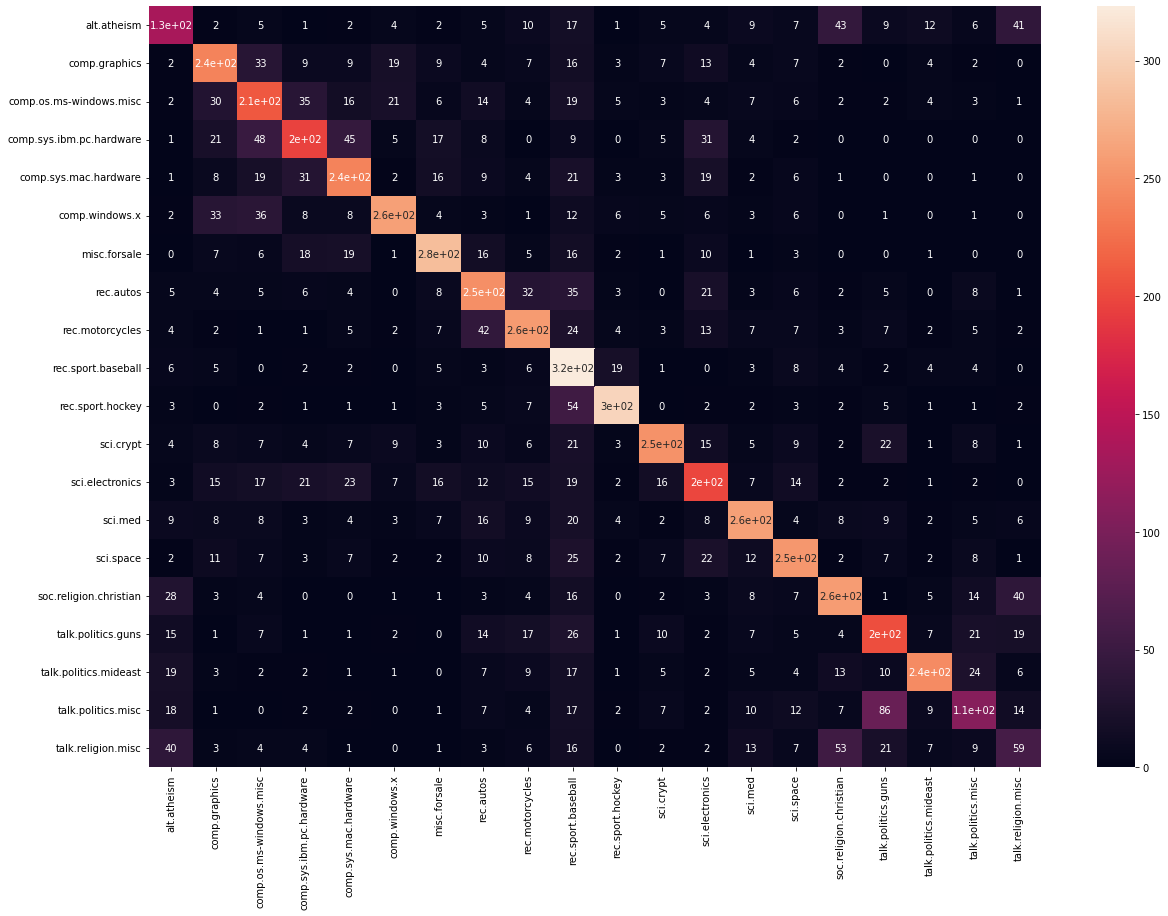

In [ ]:
#News data softmax with vectorized x values
softmax(vec_news_train[:5*int(vec_news_train.shape[0] / 5),:], news_train_y[:5*int(len(news_train_y)/5)],vec_news_test,news_test_y,newsTest.target_names, C=0.75 , max_iter=200, fit_intercept=True)

Overall accuracy is 65.4%
                          alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
alt.atheism                       156              4                        1   
comp.graphics                       4            245                       24   
comp.os.ms-windows.misc             4             23                      231   
comp.sys.ibm.pc.hardware            0             10                       41   
comp.sys.mac.hardware               1              8                       17   
comp.windows.x                      2             46                       25   
misc.forsale                        2              3                        4   
rec.autos                           3              4                        3   
rec.motorcycles                     3              3                        1   
rec.sport.baseball                  7              3                        1   
rec.sport.hockey                    3              0                        0   
sc

0.6537440254912373

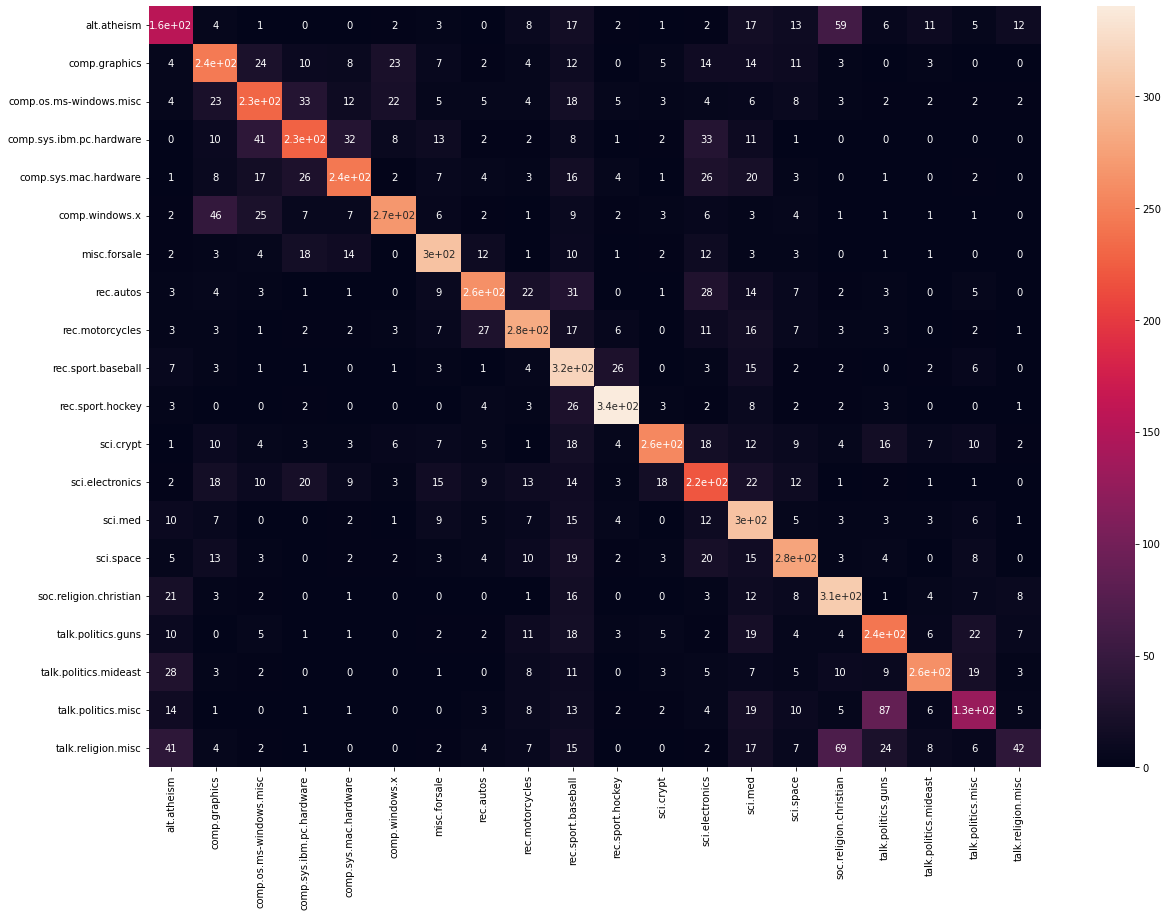

In [ ]:
#News data softmax with idf x values
softmax(idf_news_train, news_train_y,idf_news_test,news_test_y,newsTest.target_names,C= 0.75, max_iter=200, fit_intercept=True)

### Sent 140 Data

Overall accuracy is 82.2%
       Happy  Sad
Happy    138   39
Sad       25  157

 Here is the accuracy for each class

 Happy 	 77.97 %

 Sad 	 86.26 %


0.8217270194986073

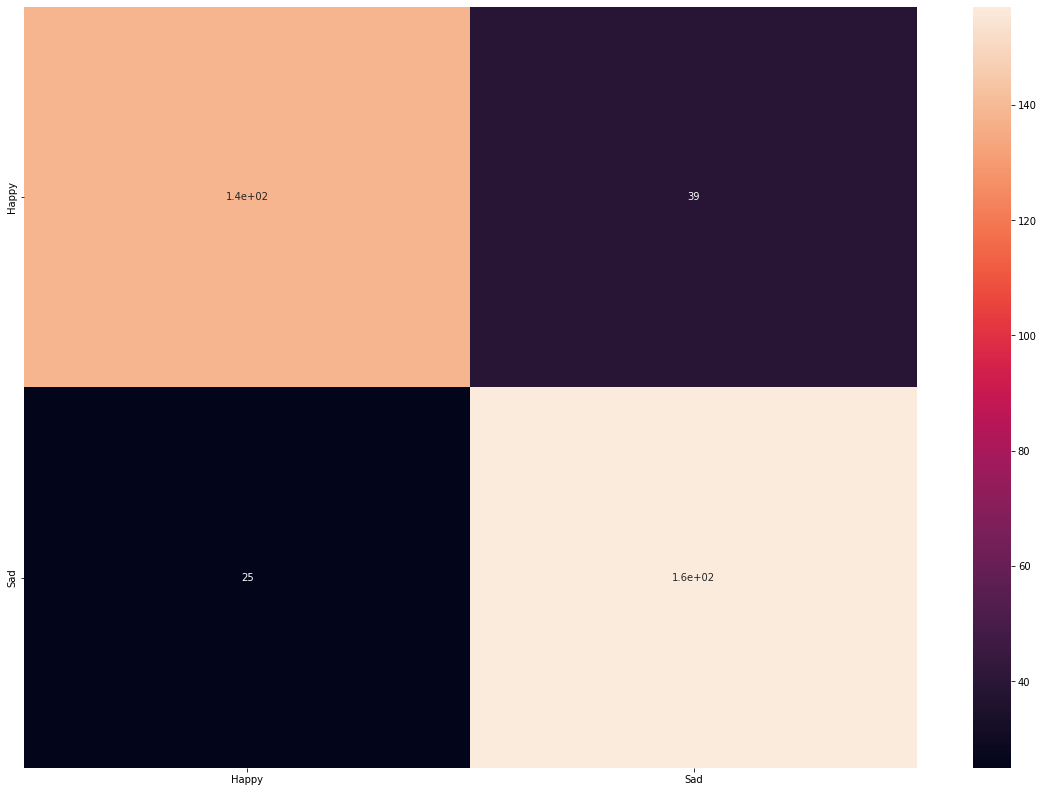

In [ ]:
# print(vectorized_training_data_sent140.shape)
# print(len(training_labels_sent140))
# print(vectorized_test_data_sent140.shape)
# print(len(test_labels_sent140))

softmax(vectorized_training_data_sent140[:5*int(vectorized_training_data_sent140.shape[0] / 5),:], training_labels_sent140[:5*int(len(training_labels_sent140) / 5)], vectorized_test_data_sent140, test_labels_sent140, ["Happy","Sad"],C= 0.75,  max_iter=50, fit_intercept=True)

Overall accuracy is 80.8%
       Happy  Sad
Happy    139   38
Sad       31  151

 Here is the accuracy for each class

 Happy 	 78.53 %

 Sad 	 82.97 %


0.807799442896936

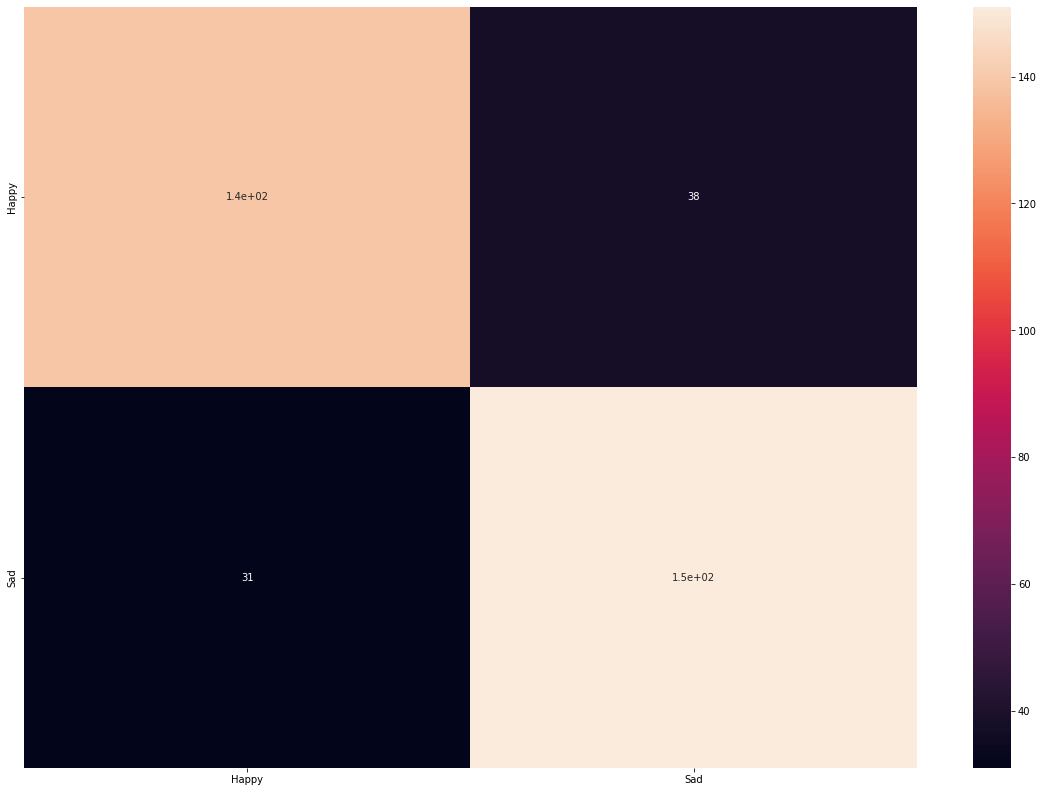

In [ ]:
softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],C= 0.75, max_iter=50)

## Hyperparameters for softmax (No longer used)




In [ ]:
#Hyperparameters and their options

# Cvals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# fitinters = [False, True]
# solvers = ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']
# maxiters = [50,100,200,400,600,800,1000]


# print("TESTING C VALUES \n")
# for c in Cvals:
#   print("\n With C val set to ", c)
#   softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = 'l2', C = c, fit_intercept = True, solver = 'lbfgs', max_iter = 100)

# print("TESTING FIT INTERCEPT \n")
# for fitcheck in fitinters:
#   print("\n With fit intercept set to ", fitcheck)
#   softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = 'l2', C = 1.0, fit_intercept = fitcheck, solver = 'lbfgs', max_iter = 100)

# print("TESTING Solvers and their respective penalty functions \n")
# for solver in solvers:

#   if solver == 'newton-cg' or solver == 'lbfgs' or solver == 'sag':
#     penalties = ['l2']
#     for penalty in penalties:
#       print("\n With penalty set to ", penalty, 'and solver set to', solver)
#       softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = penalty, C = 1.0, fit_intercept = True, solver = solver, max_iter = 100)

#   elif solver == 'liblinear':
#     penalties = ['l1', 'l2']
#     #for penalty in penalties:
#       #print("\n With penalty set to ", penalty, 'and solver set to', solver)
#       #softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = penalty, C = 1.0, fit_intercept = True, solver = solver, max_iter = 100)

#   elif solver == 'saga':
#     penalties = ['l2']
#     for penalty in penalties:
#       print("\n With penalty set to ", penalty, 'and solver set to', solver)
#       softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = penalty, C = 1.0, fit_intercept = True, solver = solver, max_iter = 100)

#   else:
#     print("bruh")

# print("TESTING Max iteration values \n")
# for maxiter in maxiters:
#   print("\n With max iterations set to ", maxiter)
#   softmax(idf_sent_train, training_labels_sent140, idf_sent_test, test_labels_sent140, ["Happy","Sad"],plot = 0,penalty = 'l2', C = 1.0, fit_intercept = True, solver = 'lbfgs', max_iter = maxiter)



# Naive Bayes

In [ ]:
np.random.seed(1234)

## Fitting the data

Implement the `fit` function that learns the model parameters. Can choose different prior using $α$ and $\beta$. For Laplace smoothing, use $\alpha = \beta = 1$.

In [ ]:
class GaussianNaiveBayes:

  def __init__(self):
    return

  def fit(self, x, y):
    x = x.toarray()
    print(str(type(x)) + " " + str(type(y)))
    N, D = x.shape
    C = np.max(y) + 1
    print("Fitting: N = %d, D = %d, C = %d" % (N, D, C))
    # one parameter for each feature conditioned on each class
    mu, sigma = np.zeros((C,D)), np.zeros((C,D))
    Nc = np.zeros(C) # number of instances in class C

    print("Fit: mu.shape = " + str(mu.shape) + "\t sigma.shape = " + str(sigma.shape))
    # for each class get the MLE (maximum likelihood estimate) for mean and std
    for c in range(C):
      x_c = x[y == c]                           #slice all the elements from class c
      # print("printing x_c:")
      # print(x_c)

      Nc[c] = x_c.shape[0]                      #get number of elements of class c
      # print("printing Nc[c]:")
      # print(Nc[c])

      mu[c,:] = np.mean(x_c,0)                  #mean of features of class c
      # print("printing mu[c,:]")
      # print(mu[c,:])
      sigma[c,:] = np.std(x_c, 0)               #std of features of class c
        
    self.mu = mu            # C x D
    self.sigma = sigma + 1E-6 * np.var(x_c, axis=0).max()        # C x D
    self.pi = (Nc+1)/(N+C)                        #Laplace smoothing (using alpha_c=1 for all c) you can derive using Dirichlet's distribution
    return self

  def predict(self, xt):
    pass

## Prediction for new data
Use log domain to avoid numerical problems.
To get probabilities, we use normalization of the posterior in the log domain as well. To avoid numerical problems, use the **log-sum-exp** trick.

Prediction is using categorical distribution because our experiments are on the 20 news dataset and the sentiment 140 datasets. In the 20 news dataset, we classify the samples into 20 categories. In the sentiment 140 dataset we classify the tweet as positive, neutral, or negative.

In [ ]:
def logsumexp(Z):                                                # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                              # max over C
    Zmax = Zmax
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp

def predict(self, xt):
    xt = xt.toarray()
    Nt, D = xt.shape
    # for numerical stability we work in the log domain
    # we add a dimension because this is added to the log-likelihood matrix
    # that assigns a likelihood for each class (C) to each test point, and so it is C x N
    log_prior = np.log(self.pi)[:, None]
    # logarithm of the likelihood term for Gaussian
    # the first two terms are the logarithm of the normalization term in the Gaussian and the final term is the exponent in the Gaussian.
    # Notice that we are adding dimensions (using None) to model parameters and data to make this evaluation.
    # The reason is that sigma and mu are C x D, while the data x is N x D. We operate on a C x N x D shape by increasing the number of dimensions when needed
    log_likelihood = -.5 * np.log(2*np.pi) - np.log(self.sigma[:,None,:]) -.5 * (((xt[None,:,:] - self.mu[:,None,:])/self.sigma[:,None,:])**2)
    # now we sum over the feature dimension to get a C x N matrix (this has the log-likelihood for each class-test point combination)
    log_likelihood = np.sum(log_likelihood, axis=2)
    # posterior calculation
    log_posterior = log_prior + log_likelihood
    posterior = np.exp(log_posterior - logsumexp(log_posterior))
    return posterior.T                                                  # dimension N x C

GaussianNaiveBayes.predict = predict

## Experiments

### 20 news group dataset
We will run the Naive Bayes algorithm on the 20 news group dataset now.

In [ ]:
model = GaussianNaiveBayes()

# Train NB News
model.fit(vec_news_train, news_train_y)
y_prob = model.predict(vec_news_test)
y_pred = np.argmax(y_prob, 1)
accuracy = np.sum(y_pred == news_test_y) / y_pred.shape[0]
print(f'test accuracy: {accuracy}')

# Train NB Sent
model.fit(vectorized_training_data_sent140, np.divide(training_labels_sent140, 4))
y_prob = model.predict(vectorized_test_data_sent140)
y_pred = np.argmax(y_prob, 1)
accuracy = np.sum(y_pred == news_test_y) / y_pred.shape[0]
print(f'test accuracy: {accuracy}')

(11314, 16357)
(11314,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


# Test sklearn NB (not used in assignment)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X, y = vec_news_train, news_train_y
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

good = (y_test == y_pred).sum()
total = X_test.shape[0]

print(good / total)

(11314, 16357)
Number of mislabeled points out of a total 2263 points : 920
0.5934600088378259


In [ ]:
from sklearn.naive_bayes import GaussianNB
X, y = idf_sent_train, training_labels_sent140
print(X.shape)
print(y)

(400000, 26997)
[4 4 0 ... 0 4 4]


In [ ]:
gnb = GaussianNB()
i = 0

while i < 300000:
  gnb.fit(X[i].toarray(), [y[i]])
  i+=1
np.seterr(divide='ignore', invalid='ignore')
i = 300001
res = []
while i< 400000:
  y_pred = gnb.predict(X[i].toarray())
  res.append(y_pred[0])
  i += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()


AttributeError: ignored

In [ ]:
res = np.array(res)
i= 300001
j = 0
good = 0
while i< 400000:
  if training_labels_sent140[i] == res[j]:
    good = good + 1 
  i+=1
  if i == 400000:
    break
print(good / 100000)


0.50166


In [ ]:
print (res[2])

4


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
i = 0
X, y = idf_sent_train, training_labels_sent140
while i < 300000:
  clf.fit(X[i].toarray(), [y[i]])
  i+=1

np.seterr(divide='ignore', invalid='ignore')
i = 300001
res = []
while i< 400000:
  y_pred = clf.predict(X[i].toarray())
  res.append(y_pred[0])
  i += 1


res = np.array(res)
i= 300001
j = 0
good = 0
while i< 400000:
  if training_labels_sent140[i] == res[j]:
    good = good + 1 
  i+=1
  if i == 400000:
    break

print(good / 100000)

0.50166


# Cross Validation


In [ ]:
def sweep_params_CV(x_train, y_train, x_valid, y_valid, model_name='gnb', dataset='sent140'):
  accuracies = []
  keys = []
  
  if model_name == 'softmax':
    # These are the ideal values we would like to sweep over but
    #  we do not have the computational capabilities to do so
    # Cvals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    # fitinters = [False, True]
    # solvers = ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']
    # maxiters = [50,100,200,400,600,800,1000]

    Cvals = [0.75,1.0]
    fitinters = [True]
    solvers = ['lbfgs']
    maxiters = [50,100,200]
    if(dataset == 'news'):
      datalabels = newsTest.target_names
    else:
      datalabels = ['Happy', 'Sad']

    for c in Cvals:
      for fi in fitinters:
        for sv in solvers:
          for mi in maxiters:
            accuracy = softmax(x_train,y_train,x_valid,y_valid,datalabels,plot = 0, penalty = 'l2', C=c, fit_intercept=fi, solver=sv, max_iter=mi)
            accuracies.append(accuracy)
            keys.append((c,fi,sv,mi))
  elif(model_name == 'gnb'):
    smoothing_params = [0, 1, 1E-3, 1E-6, 1E-9, 1E-12]
    for sp in smoothing_params:
        model = GaussianNaiveBayes(sp)
        model.fit(x_train, y_train)
        y_prob = model.predict(x_valid)
        y_pred = np.argmax(y_prob, 1)
        accuracy = np.sum(y_pred == y_valid) / y_pred.shape[0]
        print(f'test accuracy: {accuracy}')
        accuracies.append(accuracy)
        keys.append((sp))
  # print(accuracies)
  return accuracies, keys

def get_training_validation_testing(x_train, y_train, L=5):
  print(type(x_train))
  split_x_train = np.array_split(x_train, L)  # from training data, split into train and test
  split_y_train = np.array_split(y_train, L)

  list_x_train = []
  list_y_train = []
  list_x_valid = []
  list_y_valid = []

  for i in range(L):
    list_x_valid.append(split_x_train[i])
    list_y_valid.append(split_y_train[i])

    temp_list_x = []
    temp_list_y = []
    for j in range(L):
      if(i != j):
        temp_list_x.append(split_x_train[j])
        temp_list_y.append(split_y_train[j])
    list_x_train.append(np.concatenate(temp_list_x, axis=0))
    list_y_train.append(np.concatenate(temp_list_y))

  return list_x_train, list_y_train, list_x_valid, list_y_valid

def cross_validation(x_train, y_train, L=5):
  list_x_train, list_y_train, list_x_valid, list_y_valid = get_training_validation_testing(x_train, y_train)

  all_accuracies = []
  keys = []
  
  for i in range(L):
    acc, keys = sweep_params_CV(list_x_train[i], list_y_train[i], list_x_valid[i], list_y_valid[i])
    all_accuracies.append(acc)
  
  average_sweep_accuracies = np.divide(np.sum(np.array(all_accuracies), 0), L)

  max_CV_accuracy = np.amax(average_sweep_accuracies)
  params_max_CV_accuracy = keys[np.where(average_sweep_accuracies == max_CV_accuracy)[0][0]]

  print("max validation accuracy = " + str(max_CV_accuracy) + "\t (c,fi,sv,mi) = \n" + str(params_max_CV_accuracy) )
  # return k_max_CV_accuracy[0], pd.concat([training_sets[0], validation_sets[0]]), test_set
  return max_CV_accuracy, params_max_CV_accuracy

max_news, params_news = cross_validation(vec_news_train.toarray(), news_train_y)
max_sent, params_sent = cross_validation(vectorized_training_data_sent140.toarray(), training_labels_sent140)
print("done")

<class 'numpy.ndarray'>
